<a href="https://www.kaggle.com/code/blohorn/cancer-data-usa-analysis-prediction?scriptVersionId=179344982" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-data-of-united-states-of-america/cancer_reg.csv
/kaggle/input/cancer-data-of-united-states-of-america/avg_household_size_column.ipynb
/kaggle/input/cancer-data-of-united-states-of-america/avg-household-size.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
import warnings
warnings.simplefilter('ignore')
import gc

 ## Chargement des fichiers

In [4]:
def load(path):
    data = pd.read_csv(path)
    return data

In [5]:
household = load("/kaggle/input/cancer-data-of-united-states-of-america/avg-household-size.csv")
cancer_reg = load("/kaggle/input/cancer-data-of-united-states-of-america/cancer_reg.csv")

## Analyse exploratoire

In [6]:
household.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [7]:
household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [8]:
household.duplicated().sum()

0

- 3220 Région (lignes) pour 4 colonnes :
- Les Federal Information Processing Standards (FIPS) sont des standards publics développés et publiés par le gouvernement des États-Unis pour l'usage des agences gouvernementales non militaires et entrepreneurs gouvernementaux (government contractors). Beaucoup de standards FIPS sont des versions modifiées des standards ANSI, IEEE, ISO, etc.

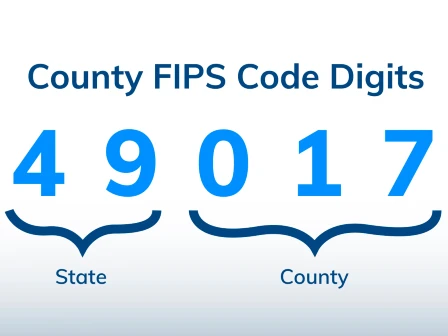

- taille moyenne des occupants 
- localisation géographique

In [9]:
cancer_reg.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [10]:
cancer_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [11]:
cancer_reg.duplicated().sum()

0

- 3047 régions pour 33 colonnes
- Les caractéristiques des régions sont en lien avec la maladie du cancer, le type de population (Blanc, noir, asiatique), le type de sécurités sociale, l'age moyen, les revenus moyens ect .... 

### Analyse univariée

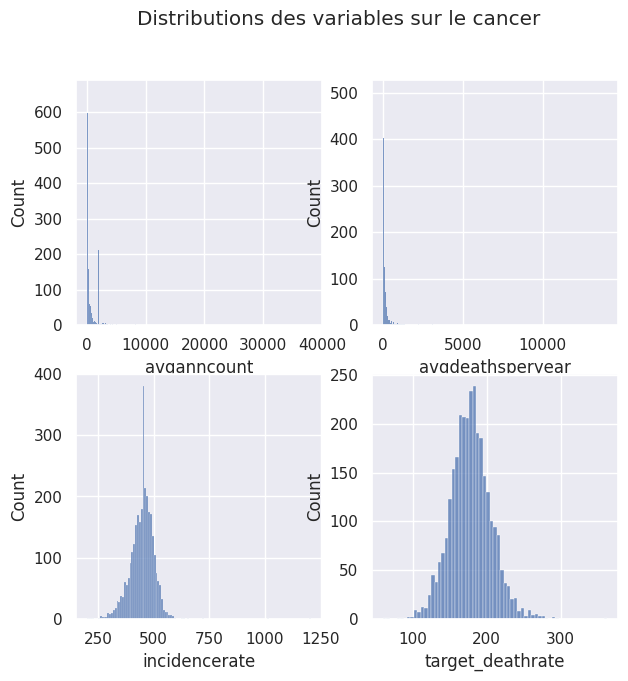

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle('Distributions des variables sur le cancer')
sns.histplot(ax=axes[0,0], data = cancer_reg['avganncount'])
sns.histplot(ax=axes[0,1], data = cancer_reg['avgdeathsperyear'])
sns.histplot(ax=axes[1,0], data = cancer_reg['incidencerate'])
sns.histplot(ax=axes[1,1], data = cancer_reg['target_deathrate'])
plt.show()


On remarque que pour la majorité des valeurs est plus petite que la moyenne du nombre moyen de cas de cancer par an! Idem pour le nombre moyen de mort du au cancer par an!

In [13]:
print(cancer_reg['target_deathrate'].skew())

0.27472416526154386


In [14]:
cancer_reg.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


- **Le taux d'incidence**, (*incidencerate*) s'exprime généralement en « nombre de personnes pour 100 000 personnes par anné
- le taux de mortalité du au cancer présente une distribution symétrique, le skewness est proche de 0. La moyenne est à peu près pareil que la médiane.
- Le taux d'incidence aussi est à peu près symétrique, on le voit dans le tableau ci_dessus, la médiane est à 453 et la moyenne à 448.

Pour ces deux variables proche de la distribution normale, regardon de plsu près **la mesure d'applatissement** ! 

In [15]:
print(cancer_reg['target_deathrate'].kurt())
print(cancer_reg['incidencerate'].kurt())

1.3546217227117037
16.796489615103464


On remarque les distributions sonts moins applatis que la distribution car supérieur à 0. **Les observations sont plus concentrées**

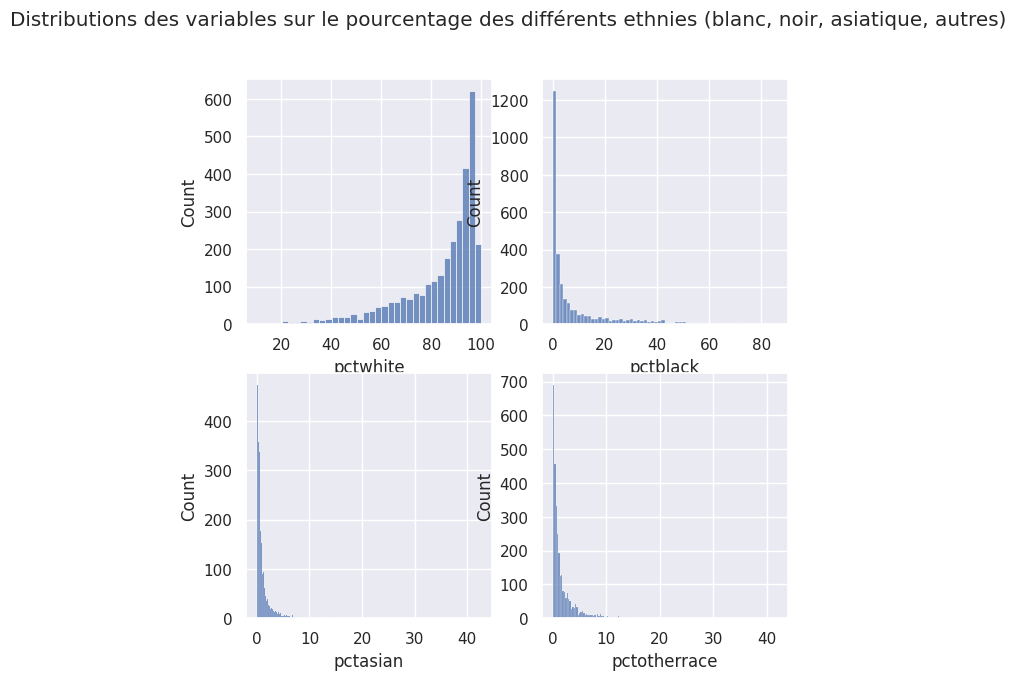

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle('Distributions des variables sur le pourcentage des différents ethnies (blanc, noir, asiatique, autres)')
sns.histplot(ax=axes[0,0], data = cancer_reg['pctwhite'])
sns.histplot(ax=axes[0,1], data = cancer_reg['pctblack'])
sns.histplot(ax=axes[1,0], data = cancer_reg['pctasian'])
sns.histplot(ax=axes[1,1], data = cancer_reg['pctotherrace'])
plt.show()


-On remarque ici que la majorité des valeurs du pourcentage de population blanche sont supérieur à la moyenne contrairement aux pourcentages des autres populations (noire, asiatique et autres).
- Il y a peu de valeurs aberrantes


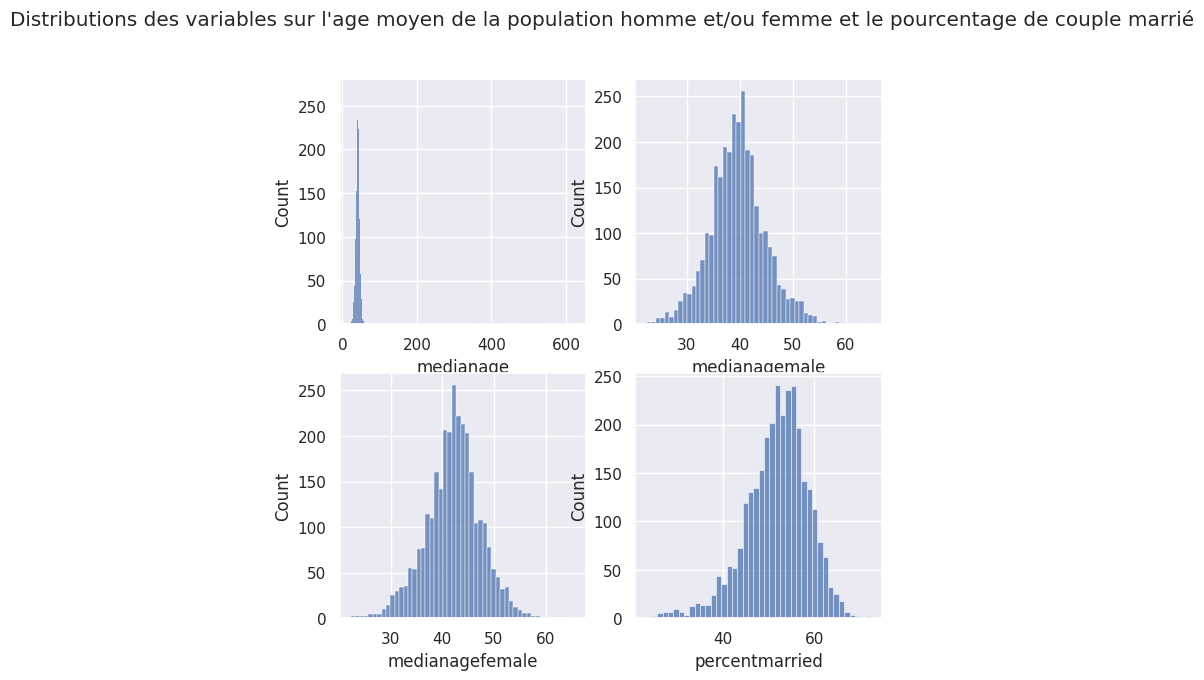

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle('Distributions des variables sur l\'age moyen de la population homme et/ou femme et le pourcentage de couple marrié')
sns.histplot(ax=axes[0,0], data = cancer_reg['medianage'])
sns.histplot(ax=axes[0,1], data = cancer_reg['medianagemale'])
sns.histplot(ax=axes[1,0], data = cancer_reg['medianagefemale'])
sns.histplot(ax=axes[1,1], data = cancer_reg['percentmarried'])
plt.show()

- Il y a peu de valeurs aberrantes

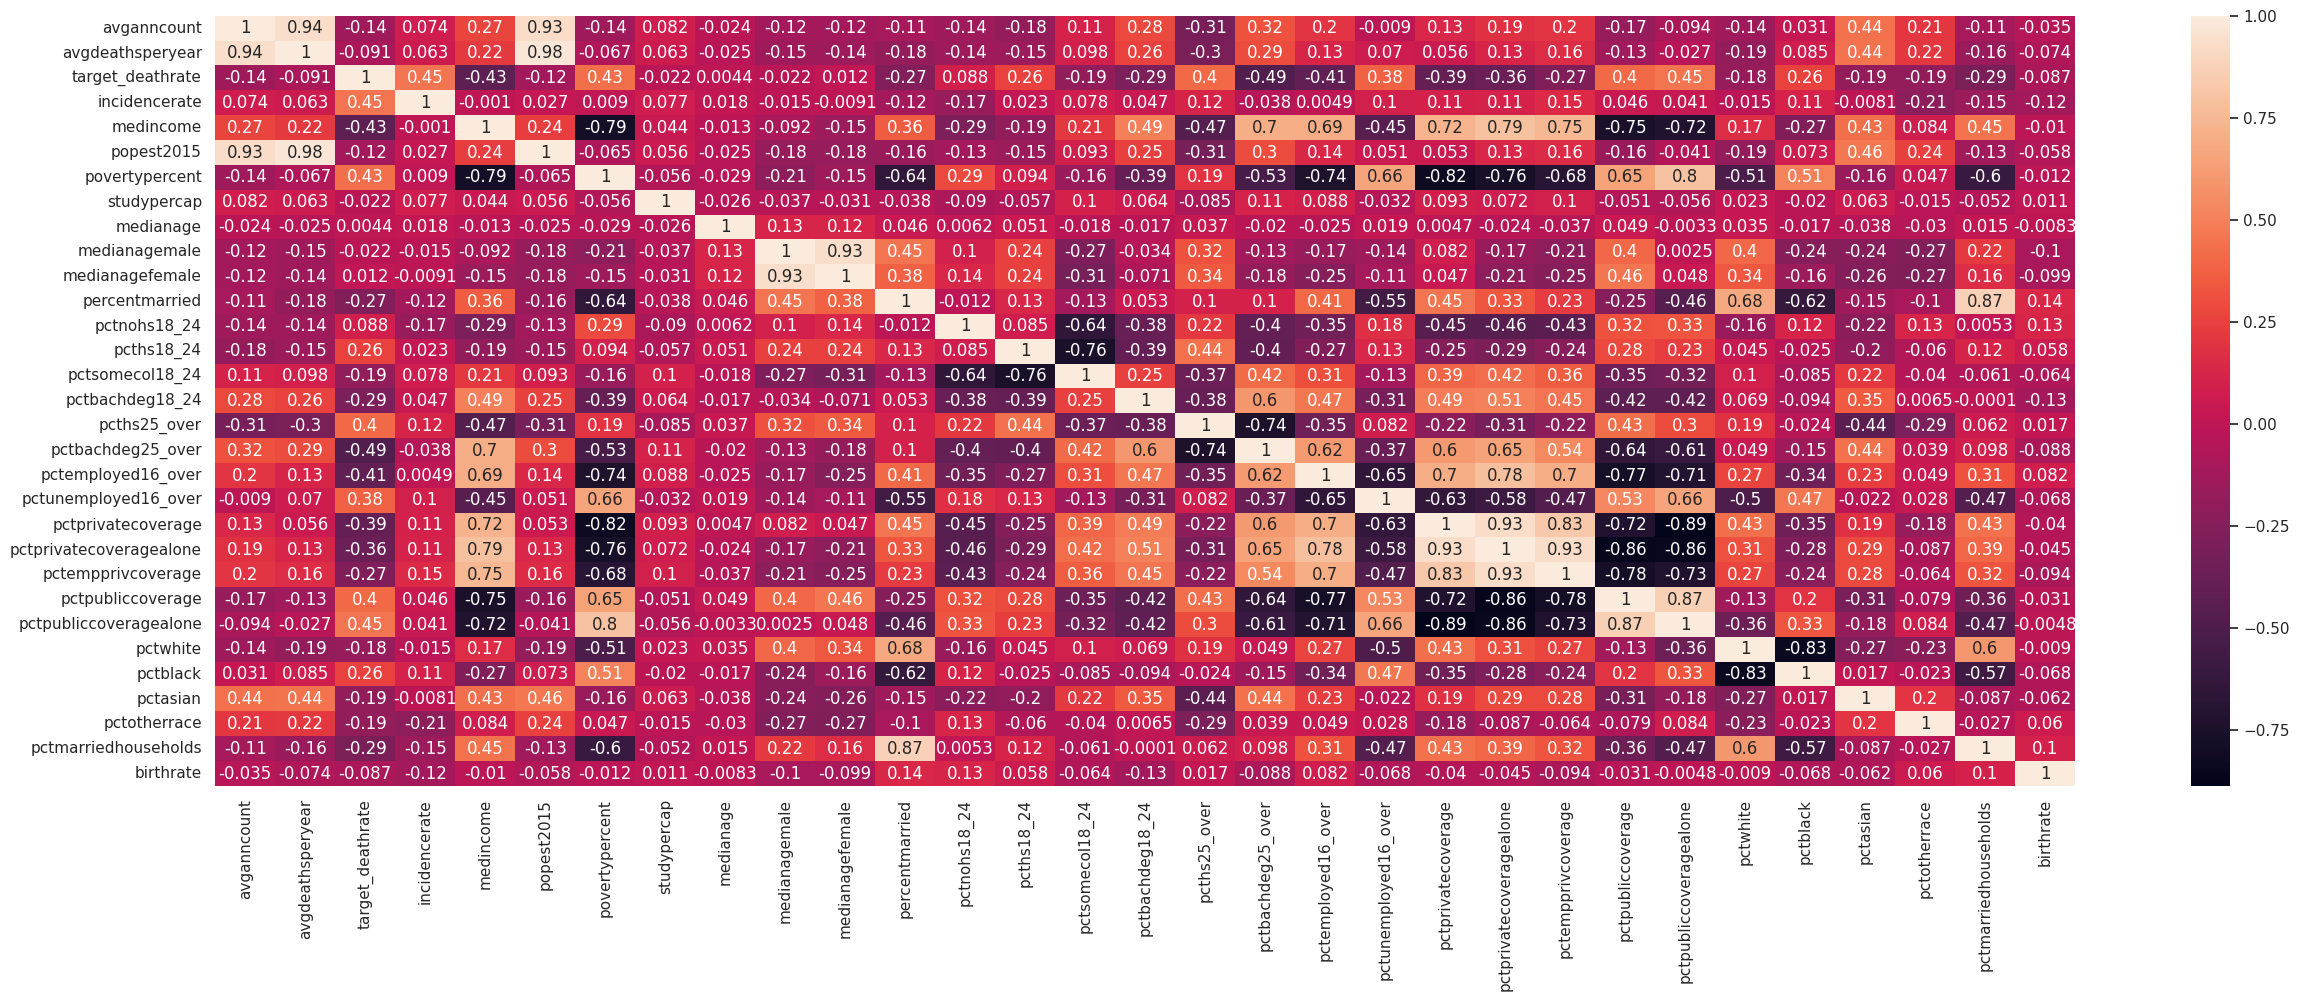

In [18]:
corr = cancer_reg.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(30,10))
sns.heatmap(corr, annot=True)
plt.show()

- target_deathrate & povertypercent 0.43, pctpubliccoveragealone 0.45, incidencerate 0.45
- avganncount & avgdeathsperyear 0.94, popest2015 0.93
- medianagemale & medianagefemale 0.93
- pctmarriedhouseholds & percentmarried 0.87
- pcttempprivcoverage & povertypercent -0.68
- pctpubliccoverage &medincome -0.72,  pctbatcheg25_over -0.61, pctemployed1_over -0.71,pctprivatecoverage -0.89, pctprovatecoveragealone -0.86, pctemprivcoverage -0.73
- pctwhite & pctblack -0.83

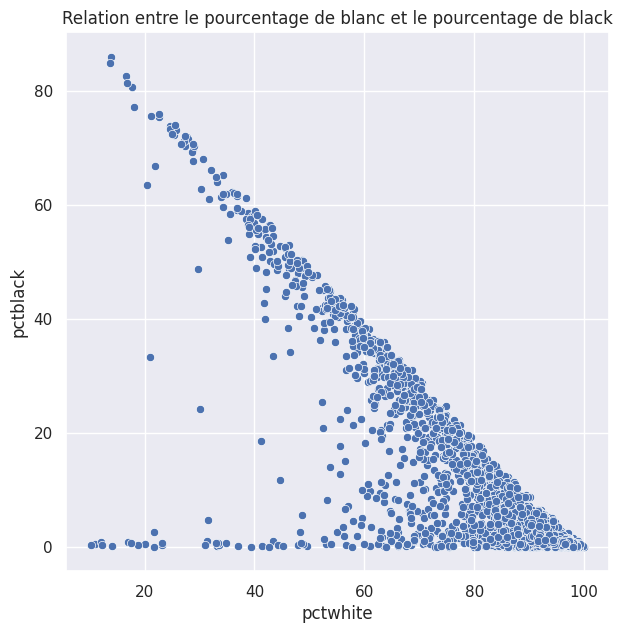

In [19]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=cancer_reg, x= 'pctwhite' ,y='pctblack')
plt.title("Relation entre le pourcentage de blanc et le pourcentage de black")
plt.show()

Pour une région donné, plus il y a de noirs, moins il y a de blanc et vice-versa. 
Au etats-unis, il y a souvent des villes entières avec des populations de couleurs et d'autres avec une population blanche

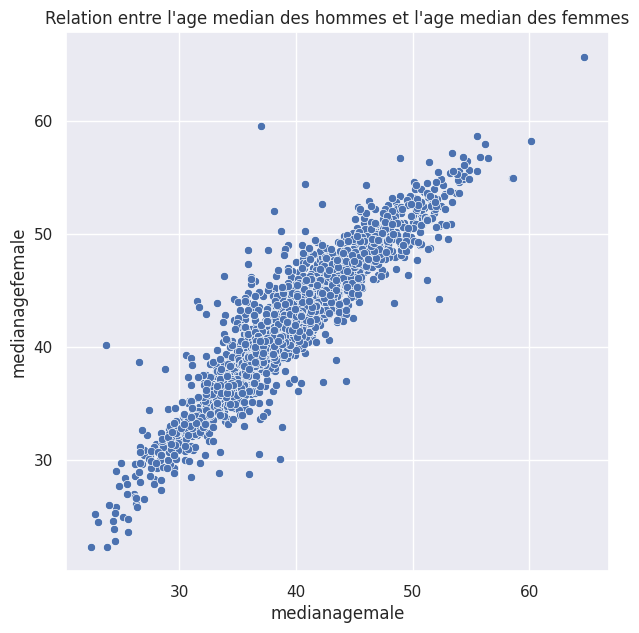

In [20]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=cancer_reg, x= 'medianagemale' ,y='medianagefemale')
plt.title("Relation entre l'age median des hommes et l'age median des femmes")
plt.show()

Target_deathrate représente le taux de mortalité du au cancer sur 100,000 personnes en un an. 

<Figure size 700x700 with 0 Axes>

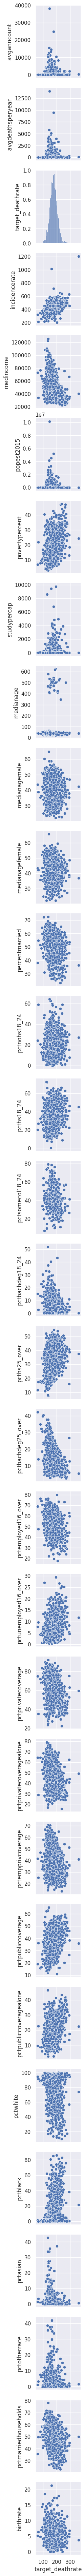

In [21]:
plt.figure(figsize=(7,7))
sns.pairplot(data=cancer_reg, palette=None, x_vars='target_deathrate', y_vars=None, kind='scatter')
plt.show()

### Fusion des deux jeus de données

In [22]:
household['fips'] = household['statefips'].astype(str).str.zfill(2) + household['countyfips'].astype(str).str.zfill(3)
df = cancer_reg.merge(household, on= 'geography')

In [23]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,fips
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54,53035
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34,53037
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62,53039
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52,53041
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34,53043


In [24]:
df['statefips'] = str(df['statefips'])
df['countyfips'] = str(df['countyfips'])

In [25]:
df.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

### Visualisation du taux de mortalité en fonction de la région 

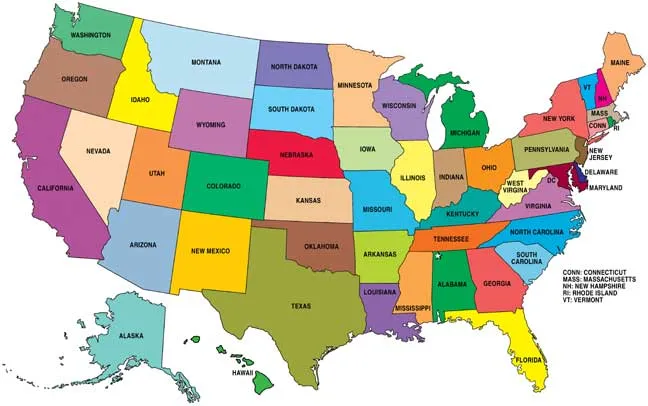

In [26]:
import plotly
plotly.__version__

'5.18.0'

In [27]:
import plotly.express as px
fig = px.choropleth(household, 
                    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json", 
                    locations='fips', 
                    color='avghouseholdsize',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    labels={'avghouseholdsize':'Avg Household Size'},
                    title='Average Household Size by County'
                    )


# Afficher la figure
fig.show()

In [28]:
import plotly.express as px
fig = px.choropleth(df, 
                    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json", 
                    locations='fips', 
                    color='target_deathrate',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    labels={'target_deathrate':'La taux de mortalité'},
                    title='Le taux de mortalité du au cancer'
                    )


# Afficher la figure
fig.show()

In [29]:
df_top_geo = df[['geography', 'avghouseholdsize','target_deathrate']].sort_values('avghouseholdsize', ascending=False).head(10)
df_top_geo

,geography,avghouseholdsize,target_deathrate
175,"McKinley County, New Mexico",3.97,137.7
2728,"Northwest Arctic Borough, Alaska",3.97,199.3
494,"Sioux County, North Dakota",3.93,259.1
2715,"Bethel Census Area, Alaska",3.86,218.8
165,"De Baca County, New Mexico",3.84,243.6
1964,"Starr County, Texas",3.84,136.5
1058,"Crowley County, Colorado",3.78,110.7
929,"San Juan County, Utah",3.75,123.9
899,"Webb County, Texas",3.73,139.1
2733,"Apache County, Arizona",3.67,142.1


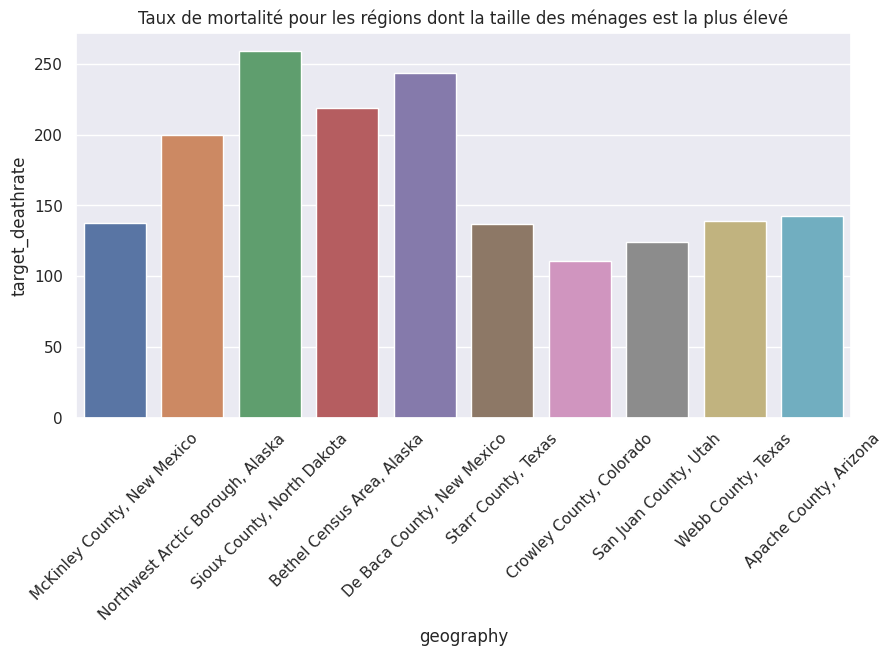

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data= df_top_geo,x='geography',y='target_deathrate')
plt.title("Taux de mortalité pour les régions dont la taille des ménages est la plus élevé")
plt.xticks(rotation=45)
plt.show()

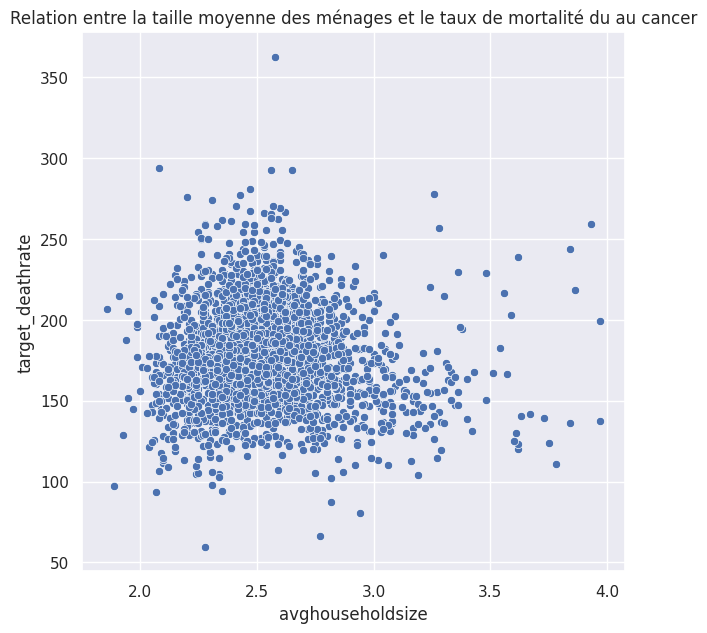

In [31]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x= 'avghouseholdsize' ,y='target_deathrate')
plt.title("Relation entre la taille moyenne des ménages et le taux de mortalité du au cancer")
plt.show()

In [32]:
df_num = df.select_dtypes(exclude=object)
df_num.tail()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,avghouseholdsize
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,48.8,51.0,20.9,27.9,NaN,8.4,32.2,15.2,51.7,4.3,78.3,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,2.08
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,31.4,52.6,26.7,33.9,35.6,3.8,23.1,12.4,70.1,4.6,64.5,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,2.90
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,31.2,54.8,19.7,44.5,33.3,2.5,23.0,12.8,64.8,6.4,62.0,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,3.04
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,40.5,58.8,10.9,37.2,NaN,4.1,36.1,14.4,NaN,6.9,75.9,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,2.56
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,26.2,25.5,27.0,59.5,8.0,43.3,43.9,4.8,29.8,13.7,48.8,9.2,76.1,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723,2.83


In [33]:
df_num.drop(columns = "pctsomecol18_24", inplace=True)
df_num.isnull().sum()

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
medianage                    0
medianagemale                0
medianagefemale              0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over         152
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone    609
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrate                    0
avghouseholdsize             0
dtype: int64

In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [35]:
col_miss= ['pctemployed16_over','pctprivatecoveragealone']
predictor = ['target_deathrate']
imputer = IterativeImputer(estimator=BayesianRidge())
imputed_data = imputer.fit_transform(df_num[predictor + col_miss])
df_num[col_miss] = imputed_data[:, -len(col_miss):]

In [36]:
df_num.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
medianage                  0
medianagemale              0
medianagefemale            0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
avghouseholdsize           0
dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardiser les données
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
pca = PCA()
pca.fit(df_num_scaled)

PCA()

In [38]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[9.38709679 5.09869869 2.52953613 2.18966261 1.6256922  1.08912663
 1.0036976  0.96941662 0.92918541 0.81798121 0.77396492 0.71532521
 0.57739191 0.50784586 0.46865125 0.41428666 0.3665559  0.3074202
 0.24315361 0.21382184 0.15074105 0.13281704 0.09764272 0.08452174
 0.07419475 0.06821678 0.05500414 0.05262558 0.03134675 0.0184455
 0.01610999]
[0.30271019 0.16442017 0.08157116 0.0706111  0.05242447 0.03512159
 0.03236672 0.03126124 0.02996389 0.02637783 0.02495842 0.02306743
 0.01861943 0.01637675 0.01511282 0.0133597  0.0118205  0.00991353
 0.00784109 0.00689521 0.00486102 0.00428301 0.00314873 0.00272561
 0.00239259 0.00219982 0.00177374 0.00169704 0.00101085 0.00059482
 0.00051951]


In [39]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(31)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,9.387097,30.0,30.0
1,Dim2,5.098699,16.0,47.0
2,Dim3,2.529536,8.0,55.0
3,Dim4,2.189663,7.0,62.0
4,Dim5,1.625692,5.0,67.0
5,Dim6,1.089127,4.0,71.0
6,Dim7,1.003698,3.0,74.0
7,Dim8,0.969417,3.0,77.0
8,Dim9,0.929185,3.0,80.0
9,Dim10,0.817981,3.0,83.0


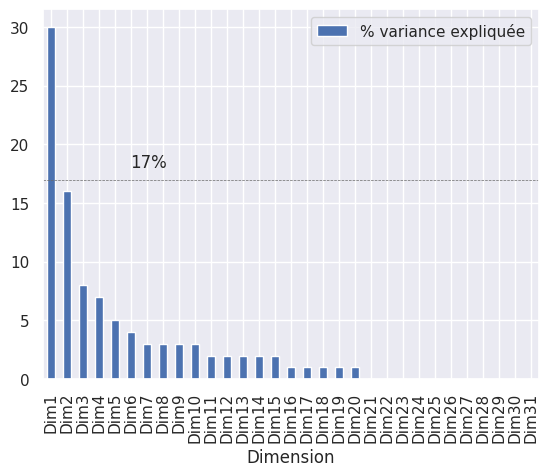

In [40]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "17%") # ajout de texte
plt.axhline(y = 17, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 6 (nb dimensions)
plt.show()

In [41]:
df_pca = pca.transform(df_num)

In [42]:
# Transformation en DataFrame pandas
pca_df = pd.DataFrame({
    "Dim1" : df_pca[:,0], 
    "Dim2" : df_pca[:,1],
    "Geography" : df["geography"],
    #"Continent" : WGI_complet["Continent"]
})

# Résultat (premières lignes)
pca_df.head()

,Dim1,Dim2,Geography
0,37202.498020,76785.977808,"Kitsap County, Washington"
1,16837.707691,14611.508522,"Kittitas County, Washington"
2,15478.155161,8368.704081,"Klickitat County, Washington"
3,18214.626889,23689.217343,"Lewis County, Washington"
4,14839.169131,5358.912390,"Lincoln County, Washington"


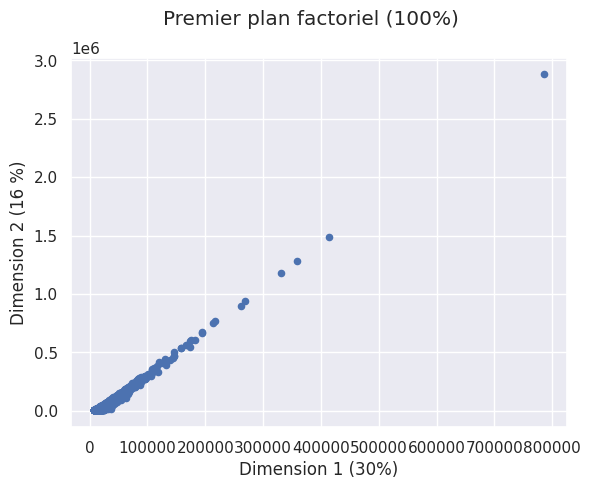

In [43]:
pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (30%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (16 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (100%)") # titre général
plt.show()

In [44]:
n = df_num.shape[0] # nb individus
p = df_num.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': df_num.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,avganncount,0.286041,0.577623
1,avgdeathsperyear,0.216794,0.627412
2,target_deathrate,-0.535173,-0.015375
3,incidencerate,-0.027967,0.041628
4,medincome,0.860566,0.114414
5,popest2015,0.230852,0.635513
6,povertypercent,-0.863265,0.306388
7,studypercap,0.095808,0.075020
8,medianage,-0.021258,-0.102762
9,medianagemale,-0.075405,-0.679899


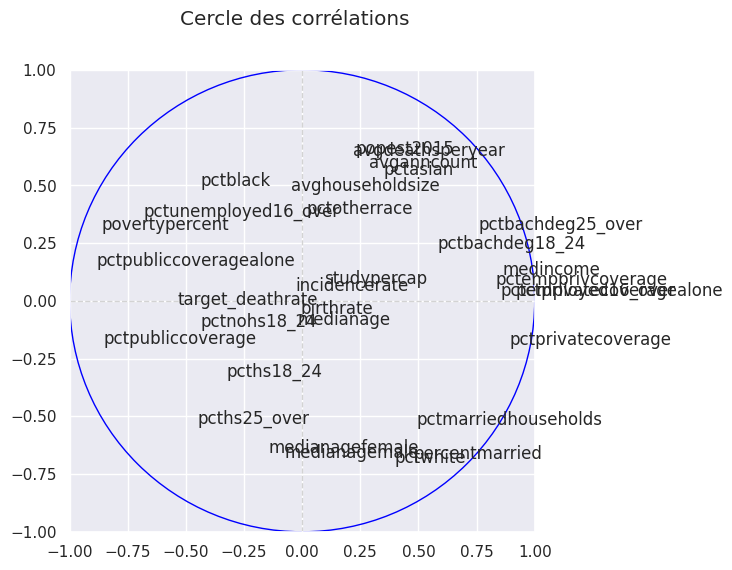

In [45]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()